# 统计图像尺寸、比例分布

同济子豪兄 https://space.bilibili.com/1900783

2022-8-1

## 导入工具包

In [3]:
import os
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

## 指定数据集路径

In [5]:
# 指定数据集路径
dataset_path = 'fruit17_full'
os.chdir(dataset_path)
os.listdir()

['丝瓜',
 '人参果',
 '佛手瓜',
 '冬瓜',
 '南瓜',
 '哈密瓜',
 '木瓜',
 '甜瓜-伊丽莎白',
 '甜瓜-白',
 '甜瓜-绿',
 '甜瓜-金',
 '白兰瓜',
 '羊角蜜',
 '苦瓜',
 '西瓜',
 '西葫芦',
 '黄瓜']

In [6]:
df = pd.DataFrame()
for fruit in tqdm(os.listdir()): # 遍历每个类别    
    os.chdir(fruit)
    for file in os.listdir(): # 遍历每张图像
        try:
            img = cv2.imread(file)
            df = df.append({'类别':fruit, '文件名':file, '图像宽':img.shape[1], '图像高':img.shape[0]}, ignore_index=True)
        except:
            print(os.path.join(fruit, file), '读取错误')
    os.chdir('../')
os.chdir('../')

100%|██████████| 17/17 [01:06<00:00,  3.94s/it]


In [8]:
df

,图像宽,图像高,文件名,类别
0,600.0,399.0,1.jpg,丝瓜
1,500.0,333.0,10.jpg,丝瓜
2,500.0,333.0,101.jpg,丝瓜
3,640.0,434.0,102.jpeg,丝瓜
4,500.0,799.0,103.jpg,丝瓜
...,...,...,...,...
2580,500.0,330.0,95.jpg,黄瓜
2581,508.0,500.0,96.png,黄瓜
2582,750.0,750.0,97.jpg,黄瓜
2583,499.0,500.0,98.jpg,黄瓜


## 可视化图像尺寸分布

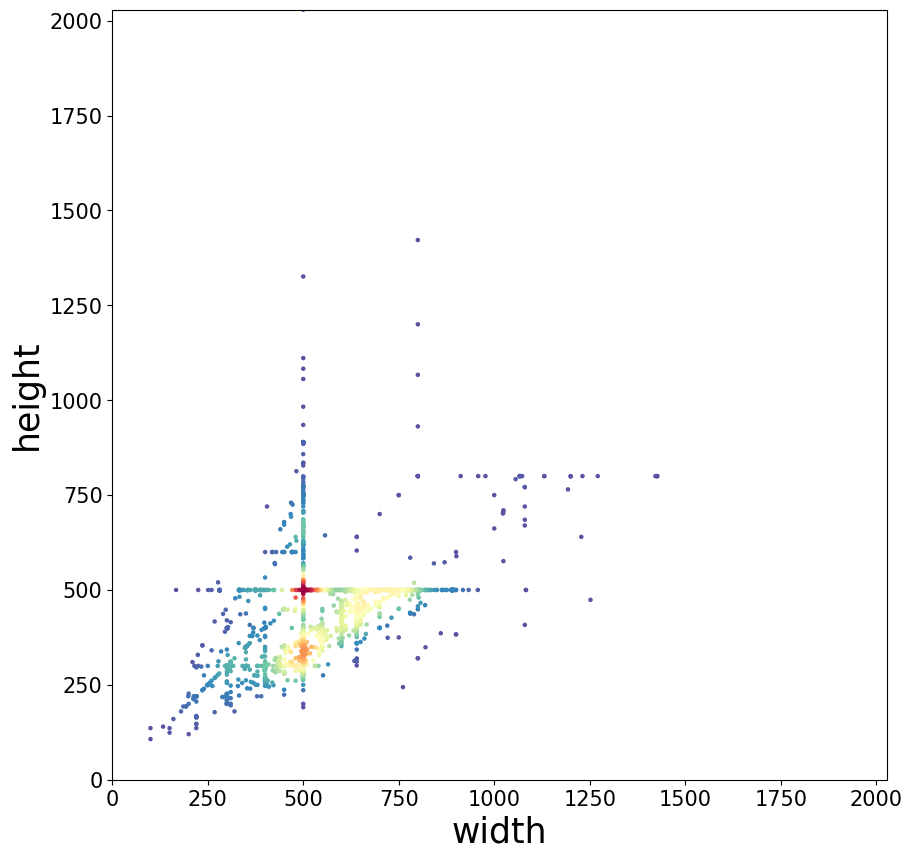

In [9]:
from scipy.stats import gaussian_kde
from matplotlib.colors import LogNorm

x = df['图像宽']
y = df['图像高']

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

plt.figure(figsize=(10,10))
# plt.figure(figsize=(12,12))
plt.scatter(x, y, c=z,  s=5, cmap='Spectral_r')
# plt.colorbar()
# plt.xticks([])
# plt.yticks([])

plt.tick_params(labelsize=15)

xy_max = max(max(df['图像宽']), max(df['图像高']))
plt.xlim(xmin=0, xmax=xy_max)
plt.ylim(ymin=0, ymax=xy_max)

plt.ylabel('height', fontsize=25)
plt.xlabel('width', fontsize=25)

plt.savefig('图像尺寸分布.pdf', dpi=120, bbox_inches='tight')

plt.show()